# Modelo de preditivo de preços das ações da WEG SA

## Obtive os dados de preços, volatilidade ao longo do tempo para a partir daí criar um modelo estatístico simples (uma regressão múltipla) que prevê os preços das ações da WEG ao longo do período considerado.

## É um modelo muito básico de predição, mas interessante.

### Carrego as bibliotecas que utilizarei:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Baixar os dados de preços das ações da WEG:

In [2]:
def dados_preçosweg():

    # Definir o intervalo de datas: de 01/01/2014 até 02/07/2024.
    start = dt.datetime(2014, 1, 1)
    end = dt.datetime(2024, 7, 2 )

    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    return df

### Colocar os dados de preços em um dataframe e plotá-los em um gráfico de linhas com duas linhas de tendência (um reta, outra curva):

In [3]:
# Obter os dados
df = dados_preçosweg()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(df)

                WEGE3
Date                 
2014-01-02   4.497041
2014-01-03   4.455621
2014-01-06   4.479289
2014-01-07   4.476331
2014-01-08   4.399408
...               ...
2024-06-25  41.570000
2024-06-26  41.950001
2024-06-27  41.700001
2024-06-28  42.189999
2024-07-01  41.970001

[2609 rows x 1 columns]


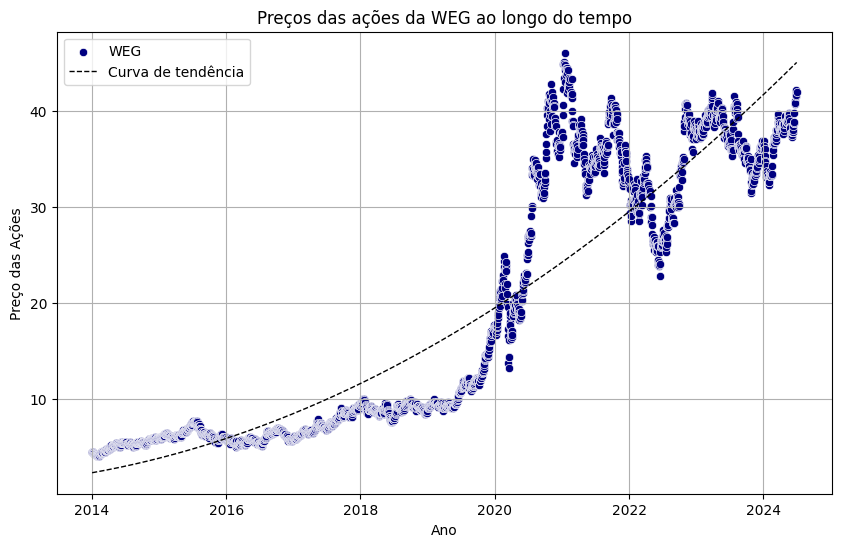

In [4]:
# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os preços das ações da WEG
sns.scatterplot(data=df, x='Date', y='WEGE3', label='WEG', color='navy')

# Adicionar linha de tendência
# Criar uma coluna Date_numeric que será a data em numérico
df['Date_numeric'] = df.index.astype('int64') // 10**9

#ajusto os dados para uma curva polinomial de grau 2
coeficientes = np.polyfit(df['Date_numeric'], df['WEGE3'], 2)

#crio um objeto de função polinomial a partir dos coeficientes fornecidos.
tendencia = np.poly1d(coeficientes)

# Ploto os dados em uma curva de tendência
plt.plot(df.index, tendencia(df['Date_numeric']), label='Curva de tendência', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Título do gráfico
plt.title('Preços das ações da WEG ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid()

# Mostrar o gráfico
plt.show()

## Distribuição dos preços em todo o período (2014 a 2024):

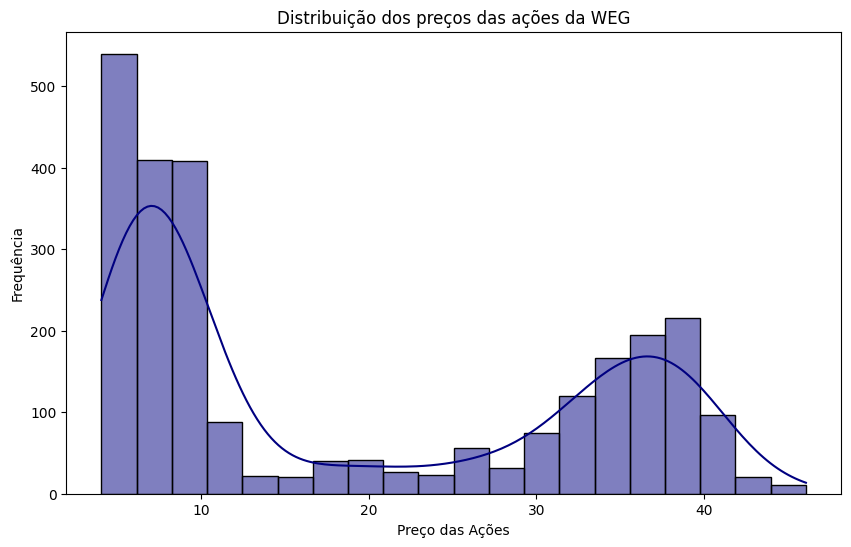

In [ ]:
#vou criar uma distribuição com seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços até 2019

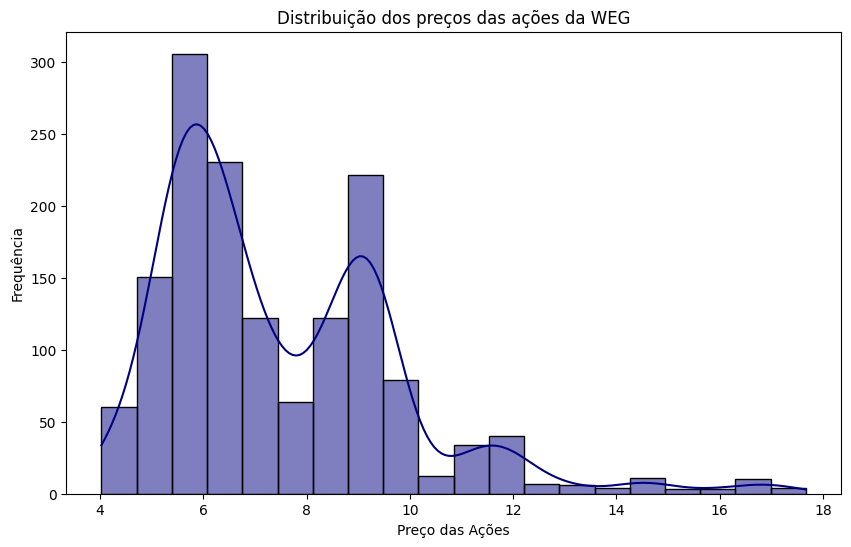

In [ ]:
# vou colocar um gráfico de distribuição até 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year <= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## Distribuição dos preços após 2019 até agora

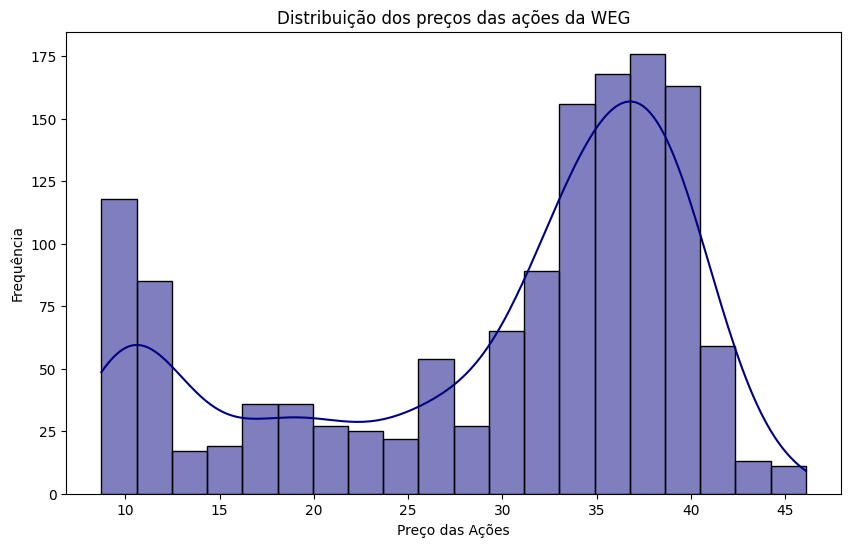

In [ ]:
#vou colocar um gráfico de distribuição a partir do ano de 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year >= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Preço das Ações')
plt.ylabel('Frequência')

# Título do gráfico
plt.title('Distribuição dos preços das ações da WEG')

# Mostrar o gráfico
plt.show()

## O patamar de preços mais comuns vem subindo

In [5]:
print(df)

                WEGE3  Date_numeric
Date                               
2014-01-02   4.497041    1388620800
2014-01-03   4.455621    1388707200
2014-01-06   4.479289    1388966400
2014-01-07   4.476331    1389052800
2014-01-08   4.399408    1389139200
...               ...           ...
2024-06-25  41.570000    1719273600
2024-06-26  41.950001    1719360000
2024-06-27  41.700001    1719446400
2024-06-28  42.189999    1719532800
2024-07-01  41.970001    1719792000

[2609 rows x 2 columns]


In [6]:
#vou colocar o index como coluna Date
df.reset_index(inplace=True)
#vou colocar como datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date      WEGE3  Date_numeric
0    2014-01-02   4.497041    1388620800
1    2014-01-03   4.455621    1388707200
2    2014-01-06   4.479289    1388966400
3    2014-01-07   4.476331    1389052800
4    2014-01-08   4.399408    1389139200
...         ...        ...           ...
2604 2024-06-25  41.570000    1719273600
2605 2024-06-26  41.950001    1719360000
2606 2024-06-27  41.700001    1719446400
2607 2024-06-28  42.189999    1719532800
2608 2024-07-01  41.970001    1719792000

[2609 rows x 3 columns]


In [7]:
# Calcular a média móvel de 50 dias para a coluna 'WEGE3'
df['SMA_50'] = df['WEGE3'].rolling(window=50).mean()

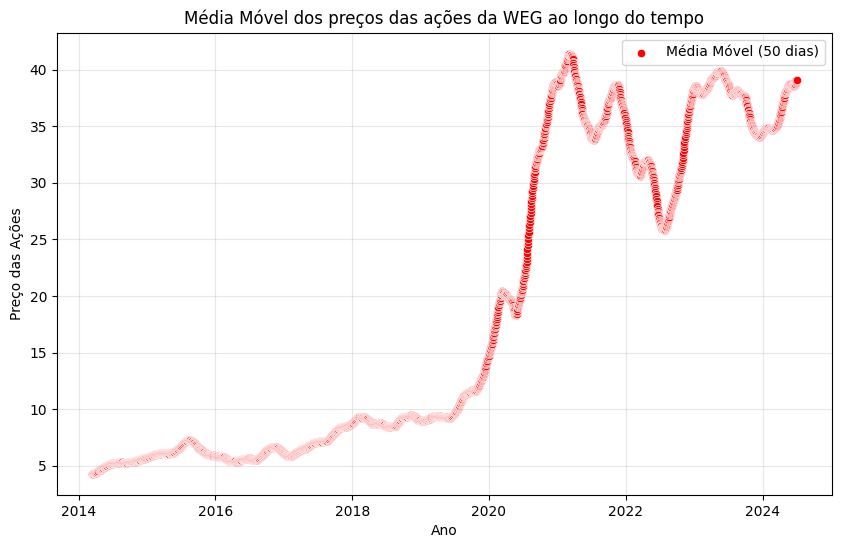

In [ ]:
#vou colocar a média móvel em um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Date', y='SMA_50', label='Média Móvel (50 dias)', color='red')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Média Móvel dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

## Vou calcular a volatilidade:

In [8]:
df['Volatility'] = df['WEGE3'].rolling(window=50).std()

## Veja a volatilidade

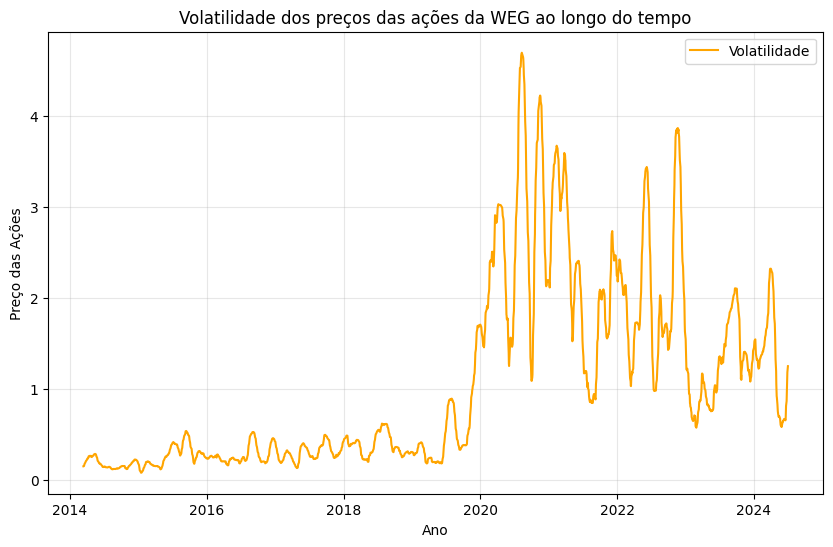

In [9]:
#vou colocar a volatilidade em um gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Volatility', label='Volatilidade', color='orange')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.title('Volatilidade dos preços das ações da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

## Veja como a volatilidade era baixíssima até a pandemia. Agora ela parece estar se estabilizando novamente.

## Vou criar o modelo preditivo

In [11]:
df = df.dropna()  # Remover quaisquer valores nulos

# Divisão dos dados:

# Vou usar 80% dos dados para treinamento e 20% para teste.
train_size = int(len(df) * 0.8)

# Separa os dados em treinamento e teste
train_data = df[:train_size]
test_data = df[train_size:]

# Treinamento do modelo:
# Separo as colunas (SMA_50 e Volatility) como variáveis independentes (X)
# e a coluna WEGE3 como variável dependente (y) nos dados de teste.
X_train = train_data[['SMA_50', 'Volatility']]
y_train = train_data['WEGE3']

# Vou estimar por Modelo de regressão linear
model = LinearRegression()

#especifico que são as variáveis independentes e a dependente
model.fit(X_train, y_train)

# Previsões:
# Separo as colunas (SMA_50 e Volatility) como variáveis independentes (X)
# e a coluna WEGE3 como variável dependente (y) nos dados de teste.
X_test = test_data[['SMA_50', 'Volatility']]
y_test = test_data['WEGE3']

# Uso o modelo treinado para fazer previsões nos dados de teste (X_test),
# armazenando as previsões em 'predictions'
predictions = model.predict(X_test)

# Avaliação do modelo:

#Calcula o erro quadrático médio (RMSE) e o erro absoluto médio (MAE) para avaliar a precisão do modelo
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

#Escreve os dois na tela
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 2.402561068118943
MAE: 1.9903296958922296


## Veja como o dataframe está agora:

In [12]:
test_data = test_data.copy()  # Vinha ocorrendo um erro nas datas
print(test_data)

           Date      WEGE3  Date_numeric   SMA_50  Volatility
2097 2022-06-13  23.820000    1655078400  28.5968    3.380243
2098 2022-06-14  24.250000    1655164800  28.3742    3.289691
2099 2022-06-15  24.000000    1655251200  28.1538    3.203377
2100 2022-06-17  22.830000    1655424000  27.9178    3.150758
2101 2022-06-20  24.100000    1655683200  27.7132    3.056618
...         ...        ...           ...      ...         ...
2604 2024-06-25  41.570000    1719273600  38.8360    0.948520
2605 2024-06-26  41.950001    1719360000  38.9222    1.029958
2606 2024-06-27  41.700001    1719446400  38.9808    1.101957
2607 2024-06-28  42.189999    1719532800  39.0602    1.185853
2608 2024-07-01  41.970001    1719792000  39.1276    1.253030

[512 rows x 5 columns]


## Vou plotar no gráfico os dados com a variação real e a variação que o modelo previu para o período

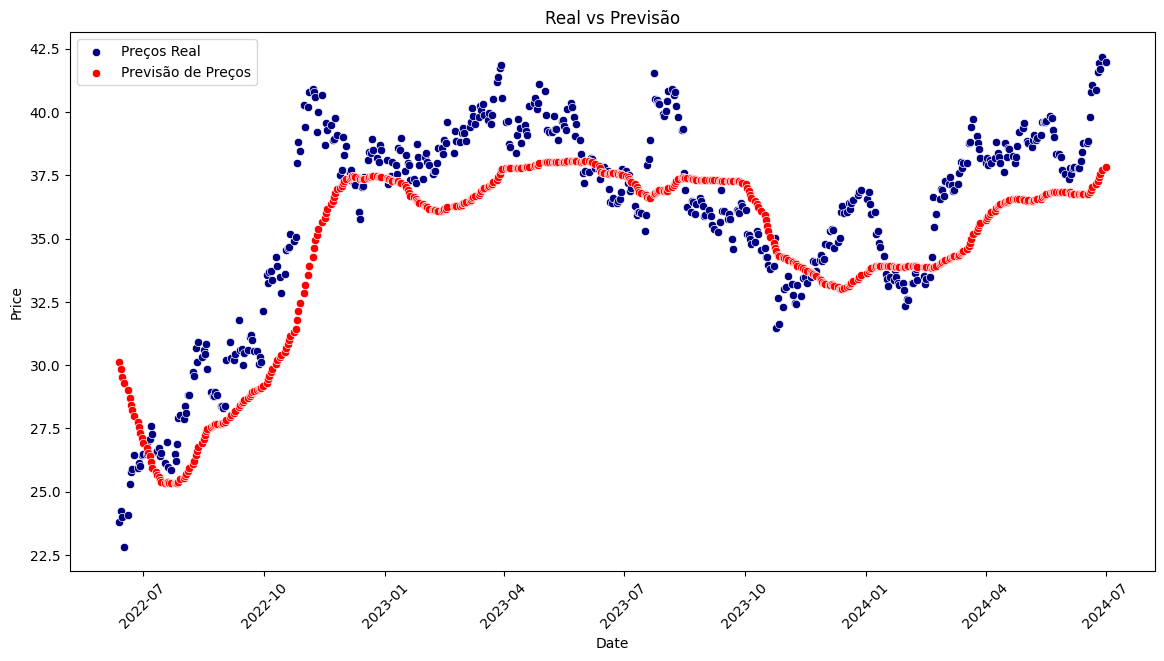

In [13]:
# Visualização dos resultados com Seaborn
plt.figure(figsize=(14, 7))

#Gráfico dos dados reais
sns.scatterplot(x=test_data['Date'], y=y_test, label='Preços Real', color='navy')

#Gráfico das previsões
sns.scatterplot(x=test_data['Date'], y=predictions, label='Previsão de Preços', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Real vs Previsão')

#Rotaciona os rótulos do eixo x
plt.xticks(rotation=45)

# Mostrar a legenda no gráfico
plt.legend()
plt.show()

## Quero utilizar esse modelo criado para prever os preços futuros das ações da WEG até o final do ano

In [46]:
# Treinamento do modelo com todos os dados

#especifico as variáveis independentes e as dependentes
X = df[['SMA_50', 'Volatility']]
y = df['WEGE3']

#crio o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Gero datas futuras até janeiro de 2025
dates_future = pd.date_range(start=df['Date'].max(), periods=8, freq='M')  # Gerando datas mensais até janeiro de 2025

# DataFrame para armazenar as datas futuras
future_data = pd.DataFrame({'Date': dates_future})

# Calcular SMA_50 e Volatility para datas futuras
# Como não temos dados reais futuros, vamos assumir que SMA_50 e Volatility para as datas futuras serão iguais ao último valor conhecido
# Este é um método simples, mas pode ser melhorado com uma abordagem mais robusta

last_sma_50 = df['SMA_50'].iloc[-1]
last_volatility = df['Volatility'].iloc[-1]

future_data['SMA_50'] = last_sma_50
future_data['Volatility'] = last_volatility

# Realizar as previsões para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previsões ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

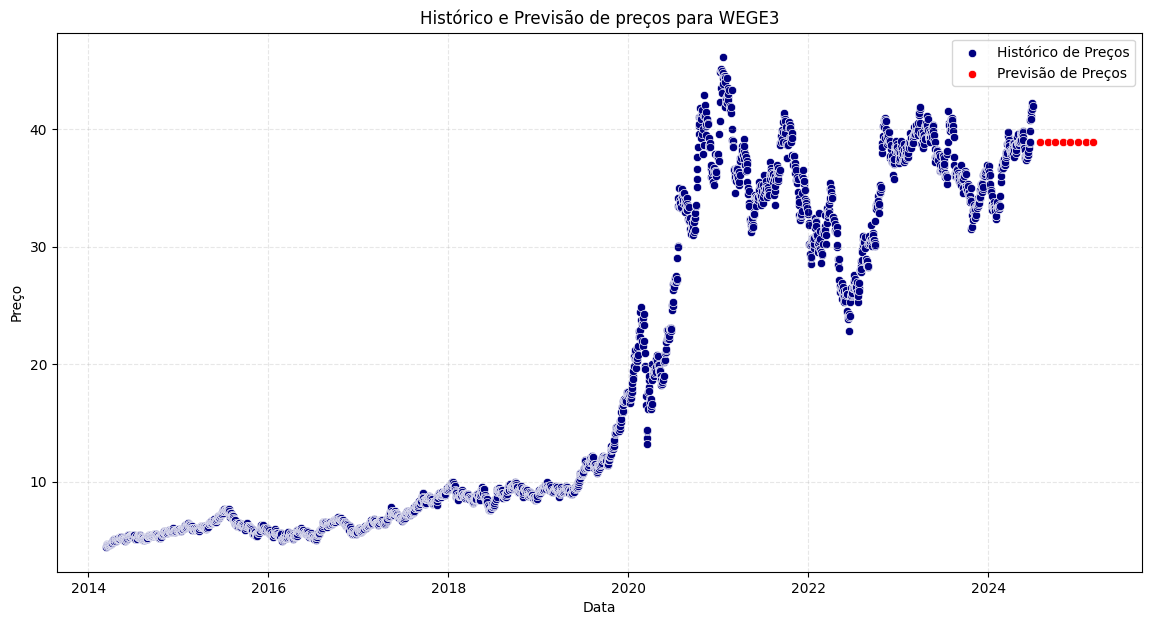

In [47]:
# Visualização dos resultados
plt.figure(figsize=(14, 7))

#vou plotar os dados os dados e a previsão
sns.scatterplot(x=df['Date'], y=df['WEGE3'], label='Histórico de Preços', color='navy')

sns.scatterplot(x=future_data['Date'], y=future_data['Predicted_WEGE3'], label='Previsão de Preços', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Histórico e Previsão de preços para WEGE3')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

In [48]:
print(future_data)

        Date   SMA_50  Volatility  Predicted_WEGE3
0 2024-07-31  39.1276     1.25303        38.861372
1 2024-08-31  39.1276     1.25303        38.861372
2 2024-09-30  39.1276     1.25303        38.861372
3 2024-10-31  39.1276     1.25303        38.861372
4 2024-11-30  39.1276     1.25303        38.861372
5 2024-12-31  39.1276     1.25303        38.861372
6 2025-01-31  39.1276     1.25303        38.861372
7 2025-02-28  39.1276     1.25303        38.861372


## Vou colocar que a média móvel suba e a volatilidade caía um pouco. A média móvel será a do último ano mais a variação percentual no preço das ações no ano. A volatilidade vai diminuir e ficar parecido com o que aconteceu no período entre 2017 e 2019.

In [32]:
# Calcular a média móvel do último ano
sma_last_year = df[df['Date'] > df['Date'].max() - pd.DateOffset(years=1)]['WEGE3'].mean()

# Calcular a variação percentual no preço das ações no último ano
price_last_year = df[df['Date'] > df['Date'].max() - pd.DateOffset(years=1)]
price_change_percent = (price_last_year['WEGE3'].iloc[-1] - price_last_year['WEGE3'].iloc[0]) / price_last_year['WEGE3'].iloc[0]

# Ajustar a média móvel futura
future_data['SMA_50'] = sma_last_year * (1 + price_change_percent)

# Ajustar a volatilidade futura para refletir uma diminuição similar ao período entre 2017 e 2019
volatility_2017_2019 = df[(df['Date'] >= '2017-01-01') & (df['Date'] <= '2019-12-31')]['Volatility'].mean()
volatility_reduction_factor = volatility_2017_2019 / df['Volatility'].mean()
future_data['Volatility'] = df['Volatility'].iloc[-1] * volatility_reduction_factor*(1-0.4)

# Realizar as previsões para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previsões ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

In [34]:
print(future_data)

        Date     SMA_50  Volatility  Predicted_WEGE3
0 2024-07-31  40.797457    0.293231        39.821891
1 2024-08-31  40.797457    0.293231        39.821891
2 2024-09-30  40.797457    0.293231        39.821891
3 2024-10-31  40.797457    0.293231        39.821891
4 2024-11-30  40.797457    0.293231        39.821891
5 2024-12-31  40.797457    0.293231        39.821891
6 2025-01-31  40.797457    0.293231        39.821891
7 2025-02-28  40.797457    0.293231        39.821891


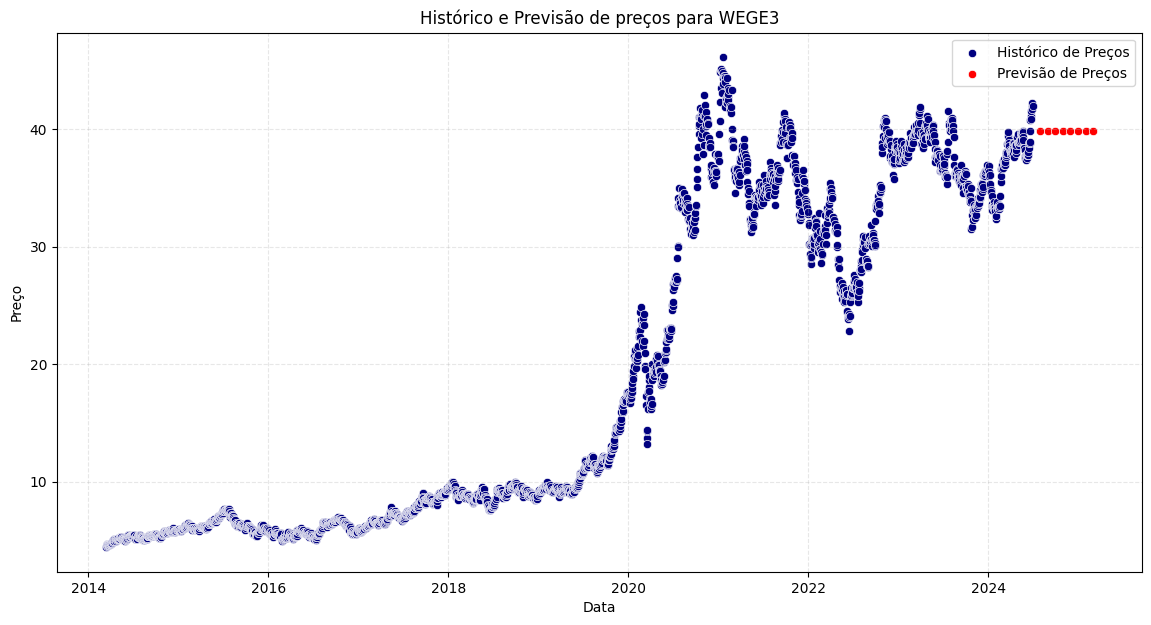

In [33]:
# Visualização dos resultados
plt.figure(figsize=(14, 7))

#vou plotar os dados os dados e a previsão
sns.scatterplot(x=df['Date'], y=df['WEGE3'], label='Histórico de Preços', color='navy')

sns.scatterplot(x=future_data['Date'], y=future_data['Predicted_WEGE3'], label='Previsão de Preços', color='red')

# Nomear os eixos do gráfico
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Histórico e Previsão de preços para WEGE3')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

## Ocorreu uma leve subida nos preços esperados pelo modelo



## Vou modificar de novo o treinamento do modelo. Agora vou colocar que a volatilidade vai cair 10% e a média móvel subir 10% em relação ao último ano.

In [40]:
# Treinamento do modelo com todos os dados
X = df[['SMA_50', 'Volatility']]
y = df['WEGE3']

model = LinearRegression()
model.fit(X, y)

# Gerar datas futuras até janeiro de 2025
dates_future = pd.date_range(start=df['Date'].max(), periods=8, freq='M')

# DataFrame para armazenar as datas futuras
future_data = pd.DataFrame({'Date': dates_future})

# Calcular a média móvel do último ano
sma_last_year = df[df['Date'] > df['Date'].max() - pd.DateOffset(years=1)]['WEGE3'].mean()

# Ajustar a média móvel futura com uma tendência de alta significativa (ex: 10% de aumento)
trend_increase_percent = 0.1
future_data['SMA_50'] = sma_last_year * (1 + trend_increase_percent)

# Ajustar a volatilidade futura com uma redução significativa (ex: 50% de redução)
future_data['Volatility'] = df['Volatility'].iloc[-1] * 0.50

# Realizar as previsões para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previsões ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

In [45]:
print(future_data)

        Date     SMA_50  Volatility  Predicted_WEGE3
0 2024-07-31  40.300731    0.626515        39.568465
1 2024-08-31  40.300731    0.626515        39.568465
2 2024-09-30  40.300731    0.626515        39.568465
3 2024-10-31  40.300731    0.626515        39.568465
4 2024-11-30  40.300731    0.626515        39.568465
5 2024-12-31  40.300731    0.626515        39.568465
6 2025-01-31  40.300731    0.626515        39.568465
7 2025-02-28  40.300731    0.626515        39.568465


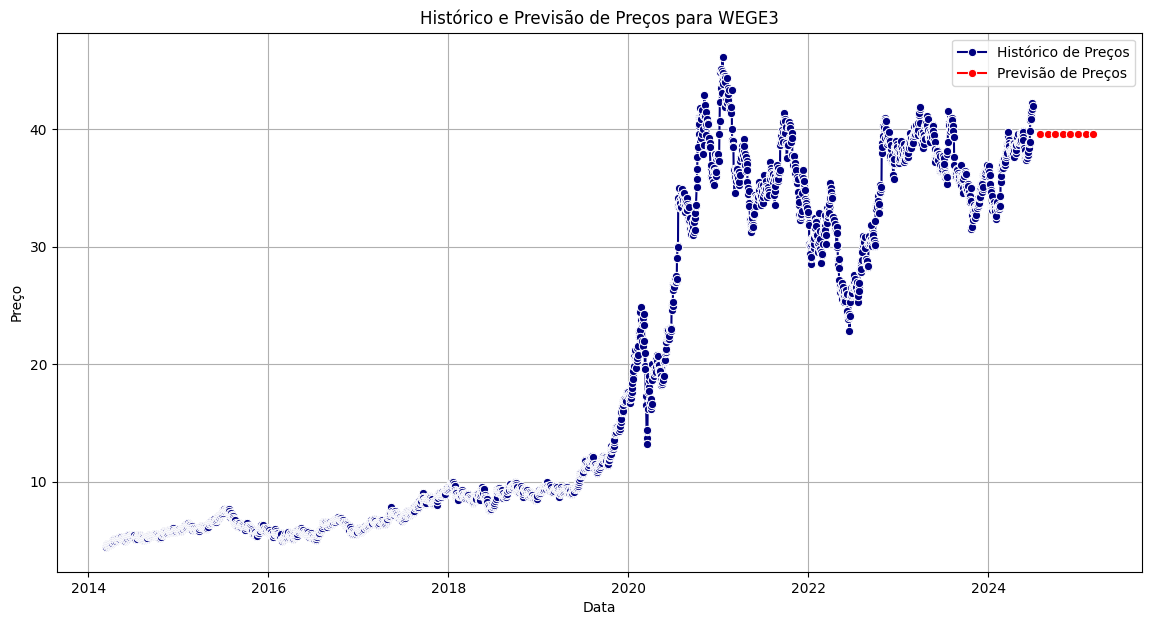

In [44]:
# Visualização dos resultados
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='WEGE3', label='Histórico de Preços', marker='o', color='navy')
sns.lineplot(data=future_data, x='Date', y='Predicted_WEGE3', label='Previsão de Preços', marker='o', color='red')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Histórico e Previsão de Preços para WEGE3')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Crie um objeto Ticker para o Ibovespa (ticker ^BVSP)
ibov = yf.Ticker("^BVSP")

# Obtenha os dados históricos para o período desejado
historical_data = ibov.history(start="2015-01-01", end="2024-12-31")['Close']

# Armazene os dados em um dataframe
df_ibov = pd.DataFrame(historical_data)

print(df_ibov)

                                   Close
Date                                    
2015-01-02 00:00:00-02:00   48512.000000
2015-01-05 00:00:00-02:00   47517.000000
2015-01-06 00:00:00-02:00   48001.000000
2015-01-07 00:00:00-02:00   49463.000000
2015-01-08 00:00:00-02:00   49943.000000
...                                  ...
2024-06-27 00:00:00-03:00  124308.000000
2024-06-28 00:00:00-03:00  123907.000000
2024-07-01 00:00:00-03:00  124718.000000
2024-07-02 00:00:00-03:00  124787.000000
2024-07-03 00:00:00-03:00  125661.890625

[2355 rows x 1 columns]


In [71]:
df_ibov.reset_index(inplace=True)
df_ibov['Date'] = pd.to_datetime(df_ibov['Date'])
df_ibov.rename(columns={'Close': 'IBOV'}, inplace=True)
print(df_ibov)

                          Date           IBOV
0    2015-01-02 00:00:00-02:00   48512.000000
1    2015-01-05 00:00:00-02:00   47517.000000
2    2015-01-06 00:00:00-02:00   48001.000000
3    2015-01-07 00:00:00-02:00   49463.000000
4    2015-01-08 00:00:00-02:00   49943.000000
...                        ...            ...
2350 2024-06-27 00:00:00-03:00  124308.000000
2351 2024-06-28 00:00:00-03:00  123907.000000
2352 2024-07-01 00:00:00-03:00  124718.000000
2353 2024-07-02 00:00:00-03:00  124787.000000
2354 2024-07-03 00:00:00-03:00  125661.890625

[2355 rows x 2 columns]


In [72]:
#vou calcular o desvio padrão da coluna IBOV
df_ibov['Volatility'] = df_ibov['IBOV'].rolling(window=50).std()

#vou calcular a média móvel da coluna IBOV
df_ibov['SMA_50'] = df_ibov['IBOV'].rolling(window=50).mean()

In [73]:
print(df_ibov)

                          Date           IBOV   Volatility         SMA_50
0    2015-01-02 00:00:00-02:00   48512.000000          NaN            NaN
1    2015-01-05 00:00:00-02:00   47517.000000          NaN            NaN
2    2015-01-06 00:00:00-02:00   48001.000000          NaN            NaN
3    2015-01-07 00:00:00-02:00   49463.000000          NaN            NaN
4    2015-01-08 00:00:00-02:00   49943.000000          NaN            NaN
...                        ...            ...          ...            ...
2350 2024-06-27 00:00:00-03:00  124308.000000  3073.838151  124384.800000
2351 2024-06-28 00:00:00-03:00  123907.000000  3074.439576  124379.520000
2352 2024-07-01 00:00:00-03:00  124718.000000  3074.689949  124389.960000
2353 2024-07-02 00:00:00-03:00  124787.000000  3073.417132  124383.220000
2354 2024-07-03 00:00:00-03:00  125661.890625  3074.145027  124384.997813

[2355 rows x 4 columns]


In [74]:
# Calcular a volatilidade da WEGE3 no período entre 2018 e 2020
wege_volatility = df[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2020-12-31')]['Volatility'].mean()

# Calcular a volatilidade do IBOVESPA no mesmo período
ibov_volatility = df_ibov[(df_ibov['Date'] >= '2018-01-01') & (df_ibov['Date'] <= '2020-12-31')]['Volatility'].mean()

# Calcular a diferença de volatilidade entre WEGE3 e IBOVESPA
volatility_diff = wege_volatility / ibov_volatility

# Calcular o crescimento médio dos preços das ações nos últimos 12 meses
last_year_prices = df[df['Date'] > df['Date'].max() - pd.DateOffset(years=1)]['WEGE3']
growth_rate = last_year_prices.pct_change().mean()

# Calcular a média móvel do último valor e ajustar com o crescimento médio
sma_last = df['SMA_50'].iloc[-1]
future_sma_50 = sma_last * (1 + growth_rate)

# Gerar datas futuras até janeiro de 2025
dates_future = pd.date_range(start=df['Date'].max(), periods=8, freq='M')

# DataFrame para armazenar as datas futuras
future_data = pd.DataFrame({'Date': dates_future})

# Prever a volatilidade futura baseada na volatilidade esperada do IBOVESPA multiplicada pela diferença calculada
expected_ibov_volatility = df_ibov['Volatility'].mean()  # Supondo que você tenha um valor esperado
future_volatility = expected_ibov_volatility * volatility_diff

# Adicionar a média móvel e volatilidade ajustadas ao DataFrame de futuras datas
future_data['SMA_50'] = future_sma_50
future_data['Volatility'] = future_volatility

# Treinamento do modelo com todos os dados
X = df[['SMA_50', 'Volatility']]
y = df['WEGE3']

model = LinearRegression()
model.fit(X, y)

# Realizar as previsões para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previsões ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

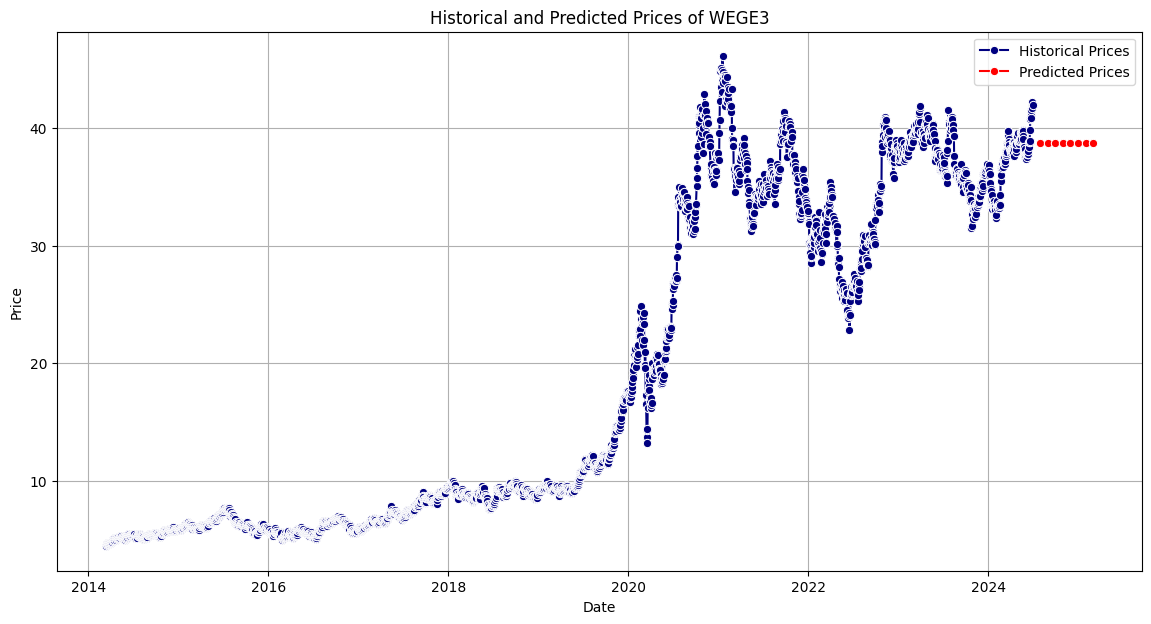

In [76]:
# Visualização dos resultados com Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='WEGE3', label='Historical Prices', marker='o', color='navy')
sns.lineplot(data=future_data, x='Date', y='Predicted_WEGE3', label='Predicted Prices', marker='o', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical and Predicted Prices of WEGE3')
plt.legend()
plt.grid(True)
plt.show()
